# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [158]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import json
import math
import seaborn as sns

%matplotlib inline

### Step 2: Read in your data set 

In [177]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()
null_data = df_raw[df_raw.isnull().any(axis=1)]
print null_data

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4
     admit  gre   gpa  prestige
187      0  NaN   NaN         2
212      0  NaN  2.87         2
236      1  660   NaN       NaN


## Questions
#### Question 1. How many observations are in our dataset? 


In [91]:
# df_raw.count() only gives the row count 
rows,vars = df_raw.shape
print(rows)
print(vars)


400
4


Answer: 400

#### Question 2. Create a summary table

In [ ]:
#function

In [7]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: the GRE observations are more spread out (wider range of values from min to max) causing a larger standard deviation. 

#### Question 4. Drop data points with missing data


In [189]:
# can check manually with df_raw[:].isnull()
# dropna == drops NaN, you can set threshold for how many NaN cells there can be -> thresh=n
df_raw.dropna()


     admit  gre   gpa  prestige
187      0  NaN   NaN         2
212      0  NaN  2.87         2
236      1  660   NaN       NaN


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [188]:
sum([True for idx,row in df_raw.iterrows() if any(row.isnull())])
# ^ will return how many have NaN
print null_data

     admit  gre   gpa  prestige
187      0  NaN   NaN         2
212      0  NaN  2.87         2
236      1  660   NaN       NaN


Answer: 

#### Question 6. Create box plots for GRE and GPA

C:\Users\Zane_Harris\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0xd1eabe0>],
 'caps': [<matplotlib.lines.Line2D at 0xd1faa58>,
 'fliers': [<matplotlib.lines.Line2D at 0xd24ab00>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xd24a588>],
 'whiskers': [<matplotlib.lines.Line2D at 0xd1eaef0>,
  <matplotlib.lines.Line2D at 0xd1fa4e0>]}

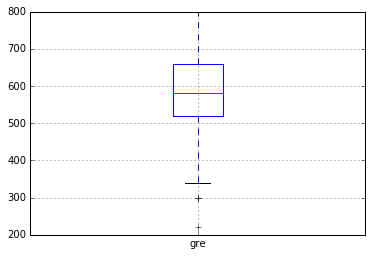

In [66]:
#boxplot 1
df_raw.boxplot(['gre'])


C:\Users\Zane_Harris\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


{'boxes': [<matplotlib.lines.Line2D at 0xcf4c048>],
 'caps': [<matplotlib.lines.Line2D at 0xcf4cd30>,
 'fliers': [<matplotlib.lines.Line2D at 0xcf57d68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xcf3be48>],
 'whiskers': [<matplotlib.lines.Line2D at 0xcf4c208>,
  <matplotlib.lines.Line2D at 0xcf4c7b8>]}

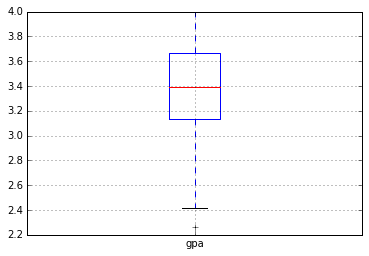

In [65]:
#boxplot 2

df_raw.boxplot(['gpa'])


#### Question 7. What do this plots show?

Answer: They show the min, max, mean and the crosshair is indicating an outlier

#### Question 8. Describe each distribution 

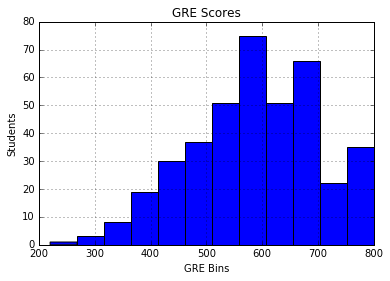

In [150]:
# plot the distribution of each variable 

df_raw.hist(['gre'], bins=12)
plt.title("GRE Scores")
plt.xlabel("GRE Bins") 
plt.ylabel("Students") 
plt.show()

# GRE Scores are pretty normally distributed with maybe a slight 
# slight negative skew (probably because while the lowest score is a 220, most people would not score so low)

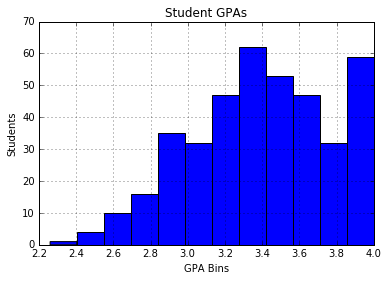

In [151]:
# plot the distribution of each variable 

df_raw.hist(['gpa'], bins=12)
plt.title("Student GPAs")
plt.xlabel("GPA Bins") 
plt.ylabel("Students")

plt.show()

# GPAs are more negatively skewed than GRE scores, but overall it's a normal
# distribution besides the large pool of 4.0 students
# slight negative skew

In [135]:
df_raw.kurt()

admit      -1.387513
gre        -0.330065
gpa        -0.574623
prestige   -0.894759
dtype: float64

In [136]:
df_raw.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: no

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: yes, work to normalize is shown below

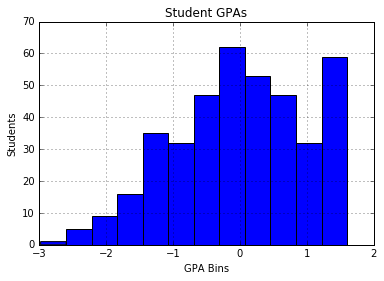

In [153]:
x = df_raw
df_norm = (x - np.mean(x))/np.std(x)
df_norm.hist(['gpa'], bins=12)
plt.title("Student GPAs")
plt.xlabel("GPA Bins") 
plt.ylabel("Students")

plt.show()

# normalized the distribution, not a major change because it was not heavily skewed in the first place

#### Question 11. Which of our variables are potentially colinear? 

             admit       gre       gpa  prestige
admit     1.000000  0.182919  0.175952 -0.241355
gre       0.182919  1.000000  0.382408 -0.124533
gpa       0.175952  0.382408  1.000000 -0.059031
prestige -0.241355 -0.124533 -0.059031  1.000000
Axes(0.125,0.125;0.62x0.775)


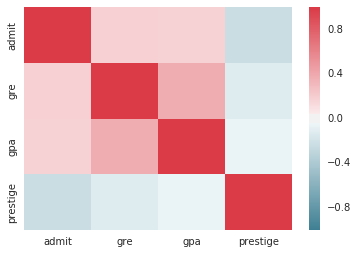

In [161]:
# create a correlation matrix for the data
# using the normalized data to create a heat map using seaborn

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df_norm.corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

# GPA and GRE scores have a 38% correlation which would make me think there are some multicollinearity issues there

#### Question 12. What did you find?

Answer: GPA and GRE are correlated positively, admission also correlates to gre and gpa positively, but not prestige (negative correlation to prestige)
I would've expected a larger negative correlation between GPA and Prestige (harder / better the school, lower the GPA, but it was only ~ -6% and ~ -12% correlation to GRE

A student would seemingly be better off going to a lower prestige school if they can get a high GPA and GRE score

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

- Determine how the variable prestige is scaled (what goes into deciding the level 1 - 4 the undergrad school lands on)
- Explore secondary data from other graduate schools to see if this is a common situation
- Collect the official UCLA graduate admissions requirements and compare to findings
- Interview an admissions officer to better understand the thinking
- Since prestige is very slightly negatively correlated to gre and gpa I'd look to see if there was any deeper relationship there

#### Question 14. What is your hypothesis? 

Answer: Applicants are more likely to be admitted to UCLA when they have a high GRE score and high GPA and UCLA admissions finds these data points to be more reliable when determining student success than the prestige of a student's undergraduate university. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

If only one variable had missing data, for example GPA was missing but GRE and admissions were not missing. You could build a model to predict the most likley GPA a student would have an insert those values

If some variables had more missing data than others you could analyze the data accoriding to availability, but that is limiting

IMPUTATION
single imputation method would just mean I could use one input to fill in missing values, but that has a large assumption, which is that we know the answer with certainty

mean imputation is just taking the mean of that variable and using it as the input for missing values, but this can lower standard deviation and pull variable correlations towards zero

random number imputation (self explanatory)

also, not sure if this method is overkill for missing values, but maybe taknig a k-NN approach would be smart or at least conservative...if you watched for the behavior of observations near the observation with missing data and replicated their inputs at least it would make the overall prediction underestimate an effect (I think lol)

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data

In [203]:
df_raw["gre"].fillna(df_raw.groupby("admit")["gre"].transform("mean"), inplace=True)
df_raw["gre"].fillna(df_raw["gre"].mean(), inplace=True)
df_raw["gpa"].fillna(df_raw.groupby("admit")["gpa"].transform("mean"), inplace=True)
df_raw["gpa"].fillna(df_raw["gpa"].mean(), inplace=True)
df_raw["prestige"].fillna(df_raw.groupby("admit")["prestige"].transform("mean"), inplace=True)
df_raw["prestige"].fillna(df_raw["prestige"].mean(), inplace=True)
sum([True for idx,row in df_raw.iterrows() if any(row.isnull())])
print df_raw.iloc?

In [204]:
print df_raw.iloc[[187, 212, 236]]

     admit  gre   gpa  prestige
188      0  560  3.07         2
214      1  600  3.56         2
239      0  700  3.45         3
